In [34]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [19]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [21]:
df.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [22]:
# Map species to integers and drop rows with NaN values
df['species'] = df['species'].map({'versicolor': 0, 'virginica': 1})

# Drop rows with NaN values in the target column
df = df.dropna(subset=['species'])

# Split dataset into independent and dependent features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
classifier=LogisticRegression()
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[ 100,200,300,400]}

In [24]:
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)
classifier_regressor.fit(X_train,y_train)

c:\Users\dhrit\OneDrive\Desktop\TY SEM2\deep learning\env\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
440 fits failed out of a total of 660.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
220 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dhrit\OneDrive\Desktop\TY SEM2\deep learning\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\dhrit\OneDrive\Desktop\TY SEM2\deep learning\env\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300, 400],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [25]:
print(classifier_regressor.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [37]:
y_pred=classifier_regressor.predict(X_test)
score= accuracy_score(y_pred,y_test)
print("Accuracy:", score)

c=confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",c)

Accuracy: 0.92
Confusion Matrix: 
 [[13  1]
 [ 1 10]]


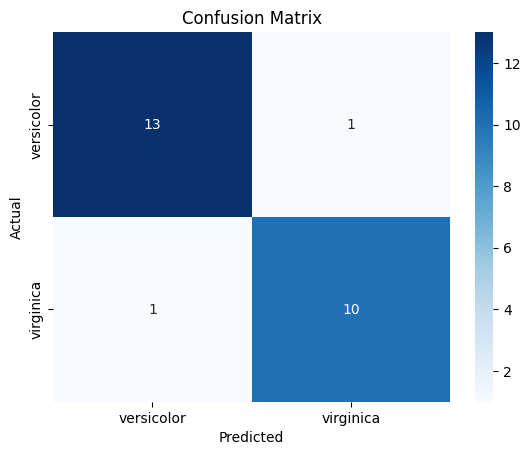

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix as a heatmap
sns.heatmap(c, annot=True, fmt='d', cmap='Blues', xticklabels=['versicolor', 'virginica'], yticklabels=['versicolor', 'virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()